In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
temp = pd.read_csv(r"D:\INDUSBLOOM\Data Science\Competitions\challenge-1\temperature_change_data_11-29-2021.csv")


In [4]:
temp.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [5]:
temp.describe()

,Element Code,Months Code,Year Code,Year,Value
count,67625.0,67625.000000,67625.000000,67625.000000,65331.000000
mean,7271.0,7018.000000,1991.306248,1991.306248,0.491524
std,0.0,1.414224,17.333343,17.333343,0.820116
min,7271.0,7016.000000,1961.000000,1961.000000,-5.979000
25%,7271.0,7017.000000,1976.000000,1976.000000,-0.011000
50%,7271.0,7018.000000,1992.000000,1992.000000,0.410000
75%,7271.0,7019.000000,2006.000000,2006.000000,0.932000
max,7271.0,7020.000000,2020.000000,2020.000000,8.206000


In [6]:
temp['Area'].value_counts()

Portugal                                                300
United Kingdom of Great Britain and Northern Ireland    300
Saudi Arabia                                            300
Solomon Islands                                         300
United Arab Emirates                                    300
                                                       ... 
Montenegro                                               75
Serbia                                                   75
Serbia and Montenegro                                    70
South Sudan                                              50
Sudan                                                    50
Name: Area, Length: 247, dtype: int64

In [7]:
areas_to_keep = ['China', 'Japan', 'Germany', 'United States of America']

evolution = temp[(temp['Flag Description']!= 'Data not available')&
                 (temp['Months']== "Meteorological year")&
                 (temp['Area'].isin(areas_to_keep))].reset_index(drop=True)

evolution['Area'] = evolution['Area'].replace(to_replace=['United States of America'],
                                             value=['United States'])

evolution = evolution.groupby(["Area", "Year"])["Value"].mean().reset_index()

evolution.head()

,Area,Year,Value
0,China,1961,0.266
1,China,1962,-0.134
2,China,1963,0.292
3,China,1964,-0.020
4,China,1965,0.081


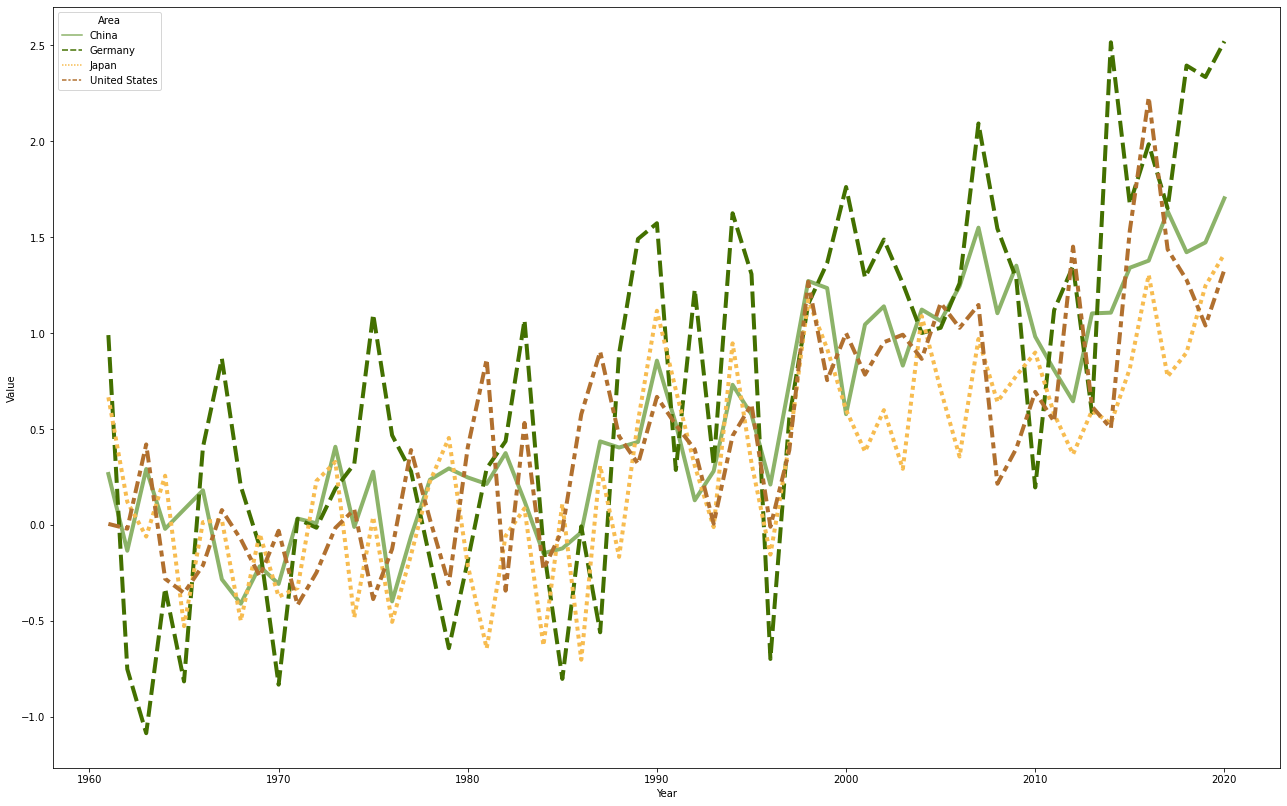

In [8]:
plt.figure(figsize=(22, 14))

line = sns.lineplot(data=evolution, x='Year', y='Value',
                   hue='Area', style='Area', lw=4,
                   palette=['#8CB369', '#437000', '#F7BC50', '#B1702F'])

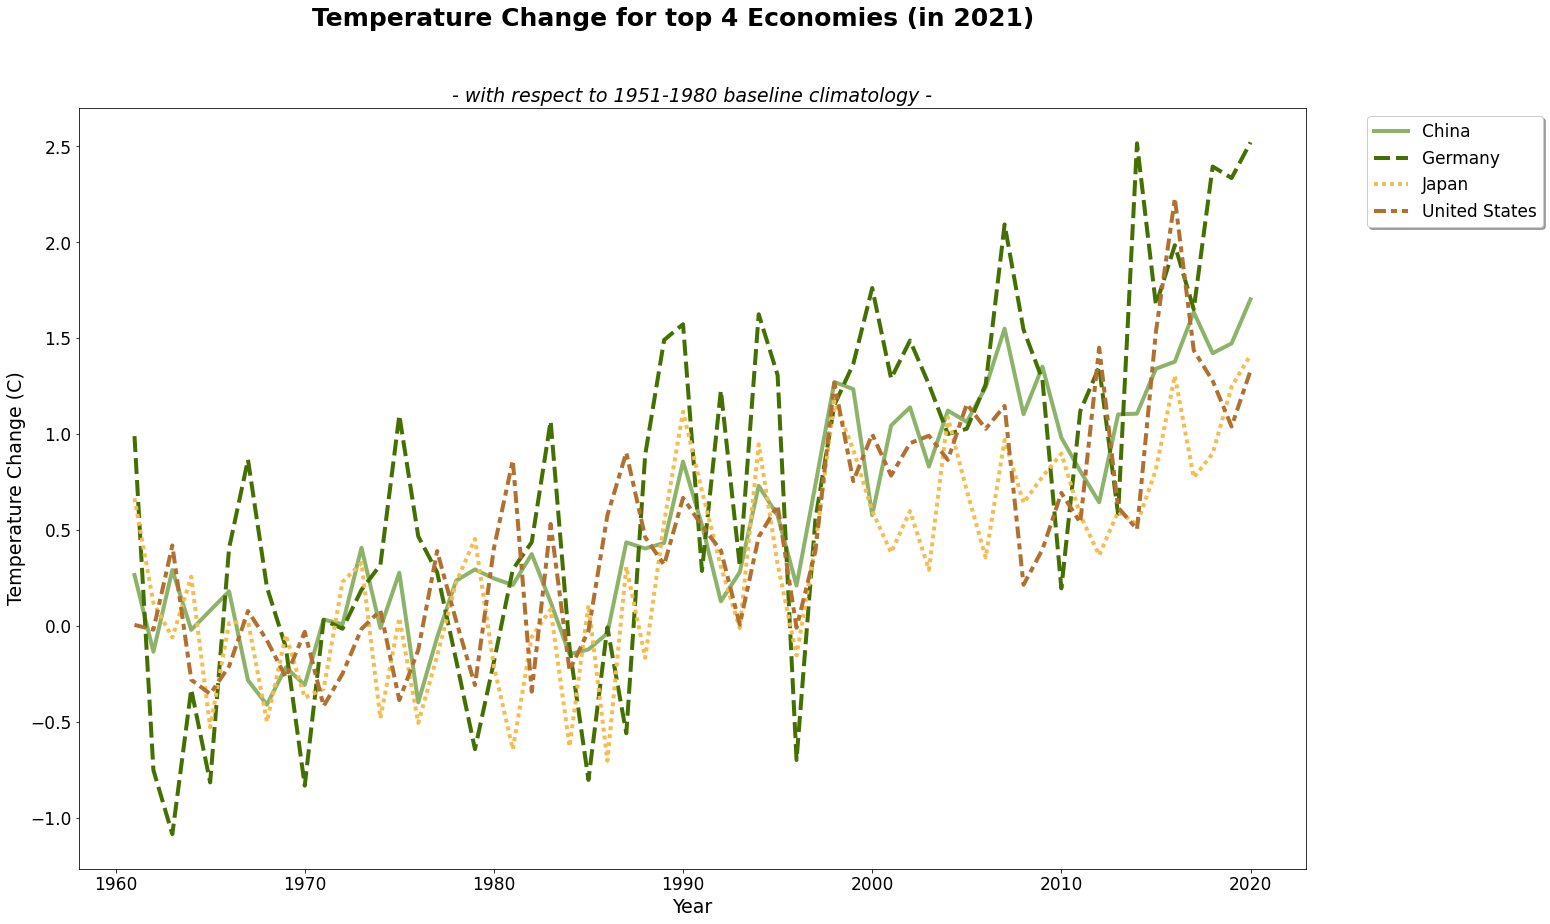

In [16]:
plt.figure(figsize=(22, 14))

line = sns.lineplot(data=evolution, x='Year', y='Value',
                   hue='Area', style='Area', lw=4,
                   palette=['#8CB369', '#437000', '#F7BC50', '#B1702F'])

plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (C)", fontsize=19)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

leg = line.legend(fontsize=17, bbox_to_anchor=(1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)



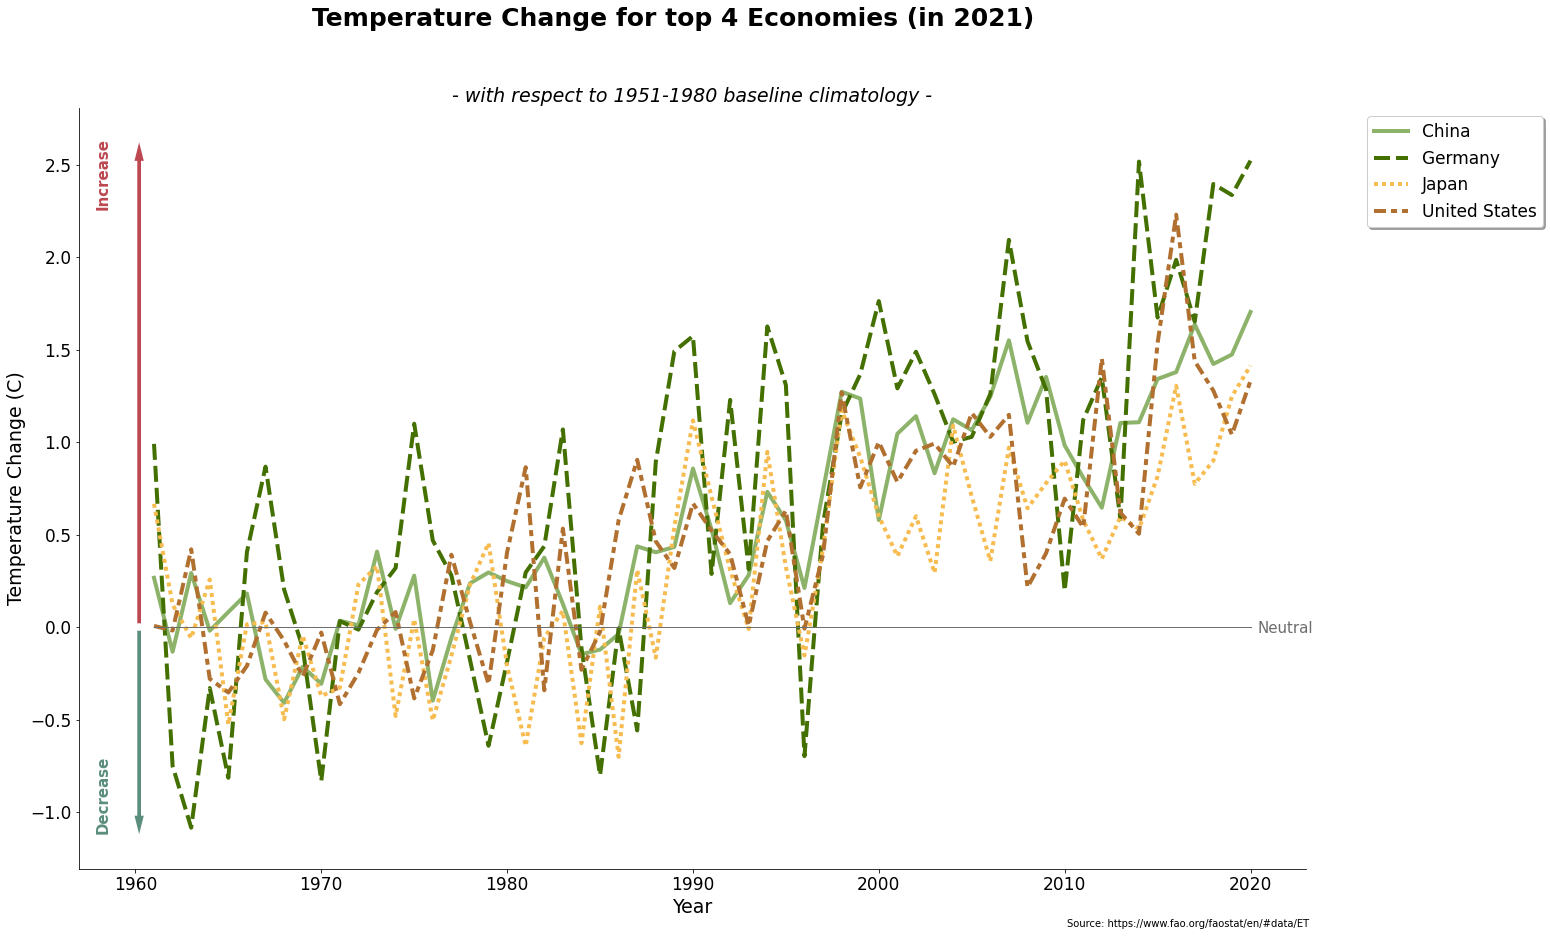

In [19]:
plt.figure(figsize=(22, 14))

line = sns.lineplot(data=evolution, x='Year', y='Value',
                   hue='Area', style='Area', lw=4,
                   palette=['#8CB369', '#437000', '#F7BC50', '#B1702F'])

plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (C)", fontsize=19)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

leg = line.legend(fontsize=17, bbox_to_anchor=(1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,
         facecolor='#BC4851', edgecolor='None')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,
         facecolor='#5B8E7D', edgecolor='None')
plt.plot([1961,2020], [0.0, 0.0], lw=1, color='#6D6D6D')

plt.text(0.014, 0.87, 'Increase', fontsize=15, color='#BC4851', weight= 'bold',
         rotation='vertical', transform=line.transAxes)
plt.text(0.014, 0.05, 'Decrease', fontsize=15, color='#5B8E7D', weight= 'bold',
         rotation='vertical', transform=line.transAxes)
plt.text(0.96, 0.31, 'Neutral', fontsize=15, color='#6D6D6D', 
         rotation='horizontal', transform=line.transAxes)

plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET',(0.87,0),(-80,-50), fontsize=10,
            xycoords='axes fraction', textcoords='offset points', va='top');